# Act 5.7 Neural Net Robot Navigation
Christian Omar Payán Torróntegui - A01742658

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

### Cargar y Preparar Datos

In [4]:
file_path = 'sensor_readings_24.data'
column_names = [f'sensor_{i + 1}' for i in range(24)] + ['label']
df = pd.read_csv(file_path, header=None, names=column_names)

X = df.iloc[:, :-1].values
y = df['label'].values

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### Entrenamiento de MLP

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=500, random_state=42, verbose=True)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

Iteration 1, loss = 1.16401672
Iteration 2, loss = 0.78585997
Iteration 3, loss = 0.54833725
Iteration 4, loss = 0.43537201
Iteration 5, loss = 0.36176071
Iteration 6, loss = 0.31182466
Iteration 7, loss = 0.27504745
Iteration 8, loss = 0.23898764
Iteration 9, loss = 0.21800298
Iteration 10, loss = 0.19651613
Iteration 11, loss = 0.17422386
Iteration 12, loss = 0.16152197
Iteration 13, loss = 0.15271933
Iteration 14, loss = 0.14507305
Iteration 15, loss = 0.12680343
Iteration 16, loss = 0.11571141
Iteration 17, loss = 0.10804839
Iteration 18, loss = 0.10358175
Iteration 19, loss = 0.09605084
Iteration 20, loss = 0.09144218
Iteration 21, loss = 0.08482879
Iteration 22, loss = 0.07802361
Iteration 23, loss = 0.10539977
Iteration 24, loss = 0.08166698
Iteration 25, loss = 0.07286288
Iteration 26, loss = 0.06990713
Iteration 27, loss = 0.07451587
Iteration 28, loss = 0.07000837
Iteration 29, loss = 0.06619740
Iteration 30, loss = 0.07489971
Iteration 31, loss = 0.07285859
Iteration 32, los

### Gráficas

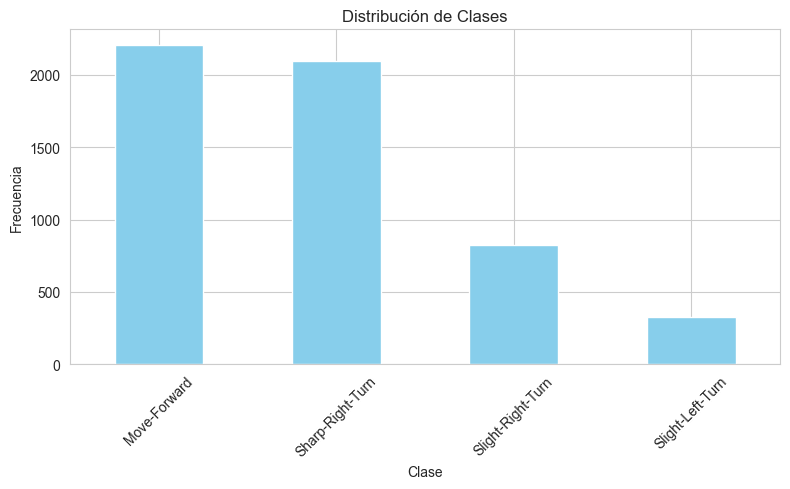

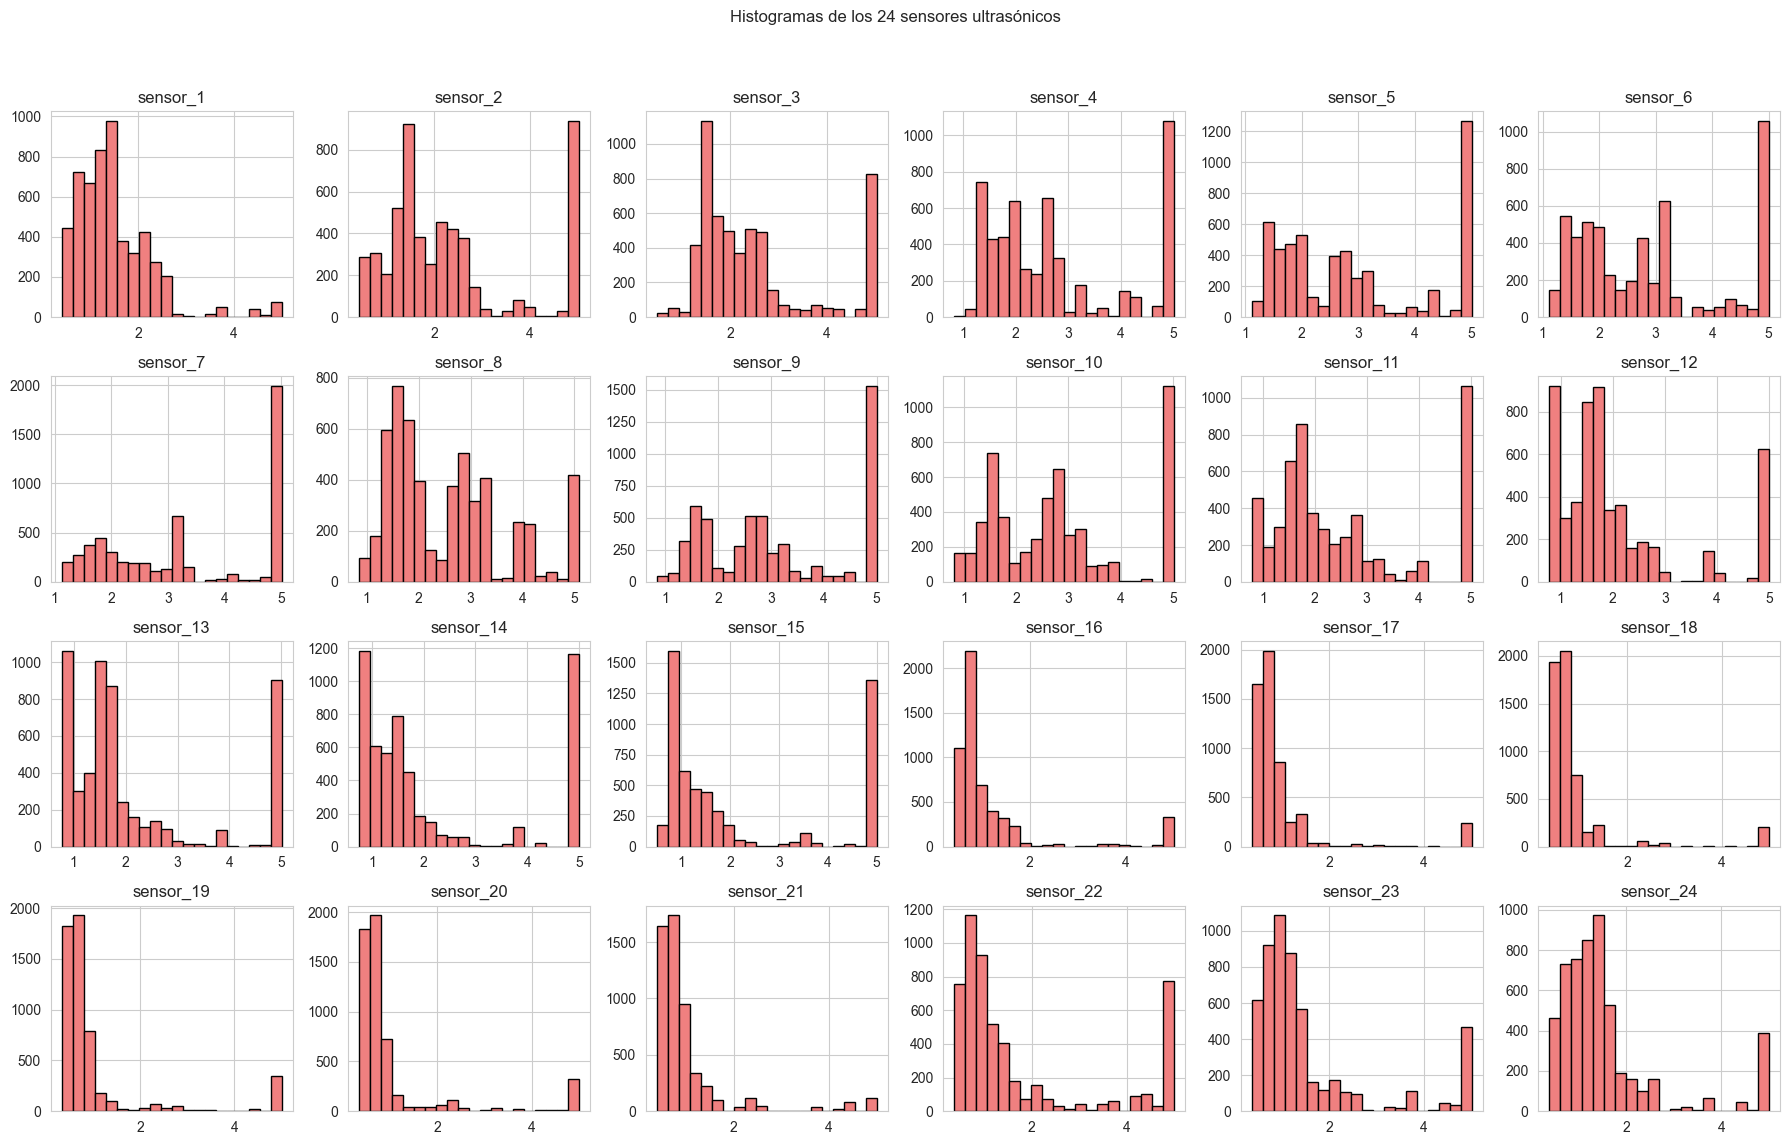

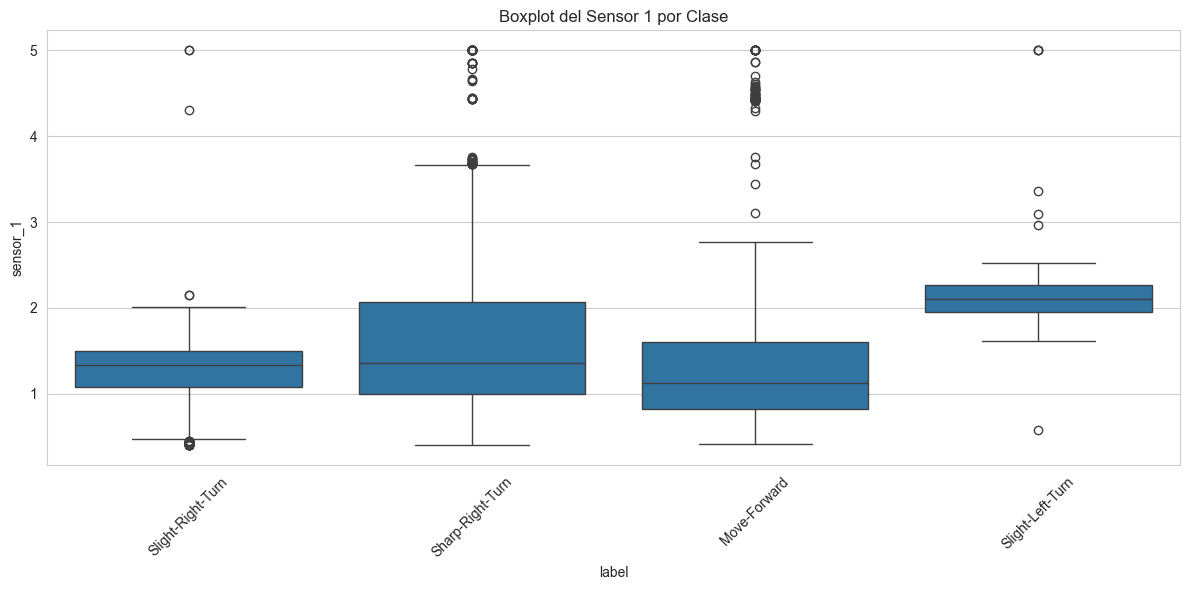

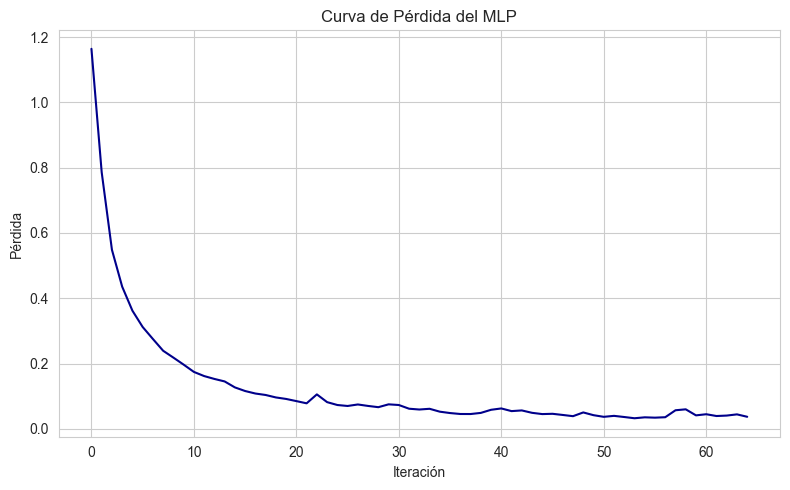

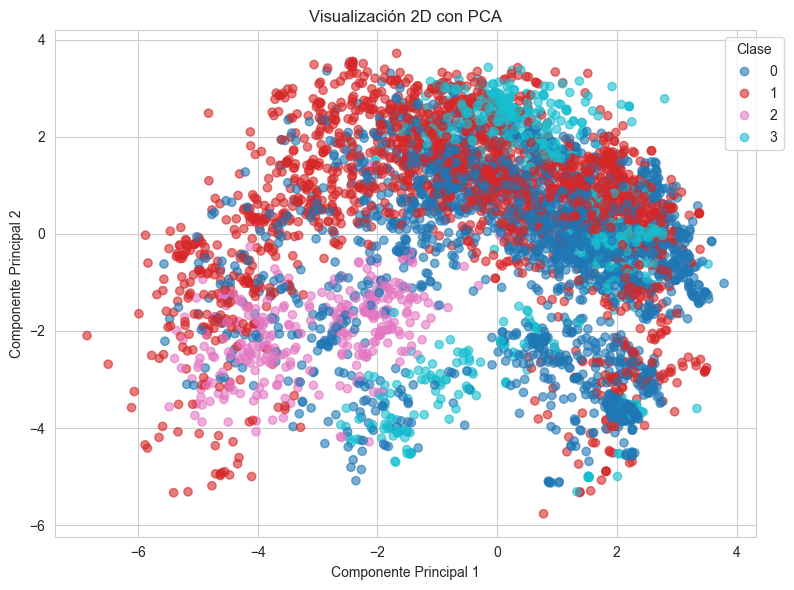

=== Reporte de Clasificación ===
                   precision    recall  f1-score   support

     Move-Forward       0.94      0.87      0.90       441
 Sharp-Right-Turn       0.92      0.95      0.93       420
 Slight-Left-Turn       0.87      0.89      0.88        66
Slight-Right-Turn       0.85      0.95      0.89       165

         accuracy                           0.91      1092
        macro avg       0.89      0.91      0.90      1092
     weighted avg       0.91      0.91      0.91      1092



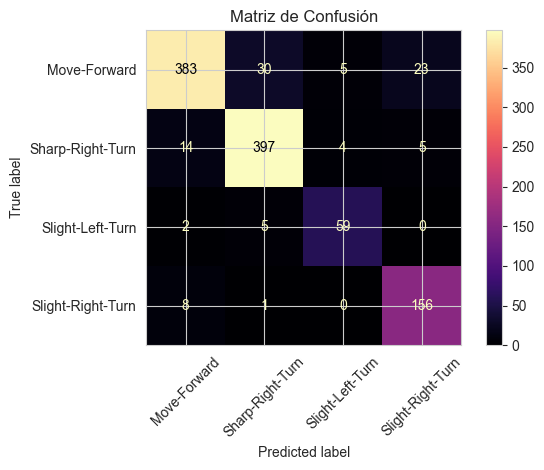

In [6]:
# Distribución de clases
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribucion_clases.png")
plt.show()

# Histogramas de los 24 sensores
df.iloc[:, :24].hist(bins=20, figsize=(18, 12), layout=(4, 6), color='lightcoral', edgecolor='black')
plt.suptitle('Histogramas de los 24 sensores ultrasónicos')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("histogramas_sensores.png")
plt.show()

# Boxplots de sensores por clase (ejemplo con sensor_1)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y='sensor_1')
plt.xticks(rotation=45)
plt.title('Boxplot del Sensor 1 por Clase')
plt.tight_layout()
plt.savefig("boxplot_sensor1.png")
plt.show()

# Curva de pérdida del entrenamiento
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, color='darkblue')
plt.title('Curva de Pérdida del MLP')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve.png")
plt.show()

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='tab10', alpha=0.6)
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=labels, title="Clase", bbox_to_anchor=(1.05, 1))
plt.title('Visualización 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.savefig("pca_2d.png")
plt.show()

# Matriz de confusión
print("=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='magma', xticks_rotation=45)
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.savefig("matriz_confusion.png")
plt.show()